In [2]:
# 패키지 설치
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
log_data = pd.read_csv('/content/drive/MyDrive/dataset/log_data.csv')
spec_data = pd.read_csv('/content/drive/MyDrive/dataset/user_spec.csv')
loan_data = pd.read_csv('/content/drive/MyDrive/dataset/loan_result.csv')
relog_data = pd.read_csv('/content/drive/MyDrive/dataset/relog.csv')

In [7]:
log_data=log_data.sort_values(by=["user_id","timestamp","event"], ascending=[True,True,True])

In [8]:
log_data

,user_id,event,timestamp,mp_os,mp_app_version,date_cd
11709372,1,GetCreditInfo,2022-05-03 14:52:28,android,464,2022-05-03
11709374,1,GetCreditInfo,2022-05-03 14:52:35,android,464,2022-05-03
2451693,1,Login,2022-06-16 23:58:41,Android,3.12.1,2022-06-16
2451691,1,UseLoanManage,2022-06-16 23:58:41,Android,3.12.1,2022-06-16
7071607,1,GetCreditInfo,2022-06-16 23:58:42,android,464,2022-06-16
...,...,...,...,...,...,...
7298671,879696,CompleteIDCertification,2022-03-14 05:38:16,Android,3.8.2,2022-03-14
7298672,879696,EndLoanApply,2022-03-14 05:42:14,Android,3.8.2,2022-03-14
8248077,879698,OpenApp,2022-05-24 22:33:24,iOS,NaN,2022-05-24
8248080,879698,StartLoanApply,2022-05-24 22:33:32,iOS,NaN,2022-05-24


각 유저 아이디당 하루에 행동(event)을 총 얼마나 했는지

In [9]:
grouped = log_data.groupby(['user_id', 'date_cd'])['user_id'].count()
grouped

user_id  date_cd   
1        2022-05-03     2
         2022-06-16     3
7        2022-05-22     1
9        2022-05-21     3
11       2022-03-24    12
                       ..
879693   2022-06-29     1
879694   2022-03-31     6
879695   2022-05-27     4
879696   2022-03-14    11
879698   2022-05-24     3
Name: user_id, Length: 2728153, dtype: int64

In [10]:
df_grouped = pd.DataFrame(grouped)
df_grouped

user_id
user_id date_cd            
1       2022-05-03        2
        2022-06-16        3
7       2022-05-22        1
9       2022-05-21        3
11      2022-03-24       12
...                     ...
879693  2022-06-29        1
879694  2022-03-31        6
879695  2022-05-27        4
879696  2022-03-14       11
879698  2022-05-24        3

[2728153 rows x 1 columns]

In [11]:
df_grouped.rename(columns = {'user_id' : 'user_id_cnt'}, inplace = True)
df_grouped

user_id_cnt
user_id date_cd                
1       2022-05-03            2
        2022-06-16            3
7       2022-05-22            1
9       2022-05-21            3
11      2022-03-24           12
...                         ...
879693  2022-06-29            1
879694  2022-03-31            6
879695  2022-05-27            4
879696  2022-03-14           11
879698  2022-05-24            3

[2728153 rows x 1 columns]

In [12]:
df_grouped_new = df_grouped.reset_index('date_cd')
df_grouped_new

,date_cd,user_id_cnt
user_id,,
1,2022-05-03,2
1,2022-06-16,3
7,2022-05-22,1
9,2022-05-21,3
11,2022-03-24,12
...,...,...
879693,2022-06-29,1
879694,2022-03-31,6
879695,2022-05-27,4


In [13]:
df_grouped_new = df_grouped_new.reset_index('user_id')
df_grouped_new

,user_id,date_cd,user_id_cnt
0,1,2022-05-03,2
1,1,2022-06-16,3
2,7,2022-05-22,1
3,9,2022-05-21,3
4,11,2022-03-24,12
...,...,...,...
2728148,879693,2022-06-29,1
2728149,879694,2022-03-31,6
2728150,879695,2022-05-27,4
2728151,879696,2022-03-14,11


In [14]:
df_grouped_new['user_id_cnt'].groupby(df_grouped_new['user_id']).sum()

user_id
1           5
7           1
9           3
11         43
12        120
         ... 
879693     61
879694      6
879695      4
879696     11
879698      3
Name: user_id_cnt, Length: 584636, dtype: int64

유저가 기간동안 총 몇일 접속했는지

In [15]:
grouped = log_data.groupby(['user_id', 'date_cd'])['user_id'].count()
grouped

user_id  date_cd   
1        2022-05-03     2
         2022-06-16     3
7        2022-05-22     1
9        2022-05-21     3
11       2022-03-24    12
                       ..
879693   2022-06-29     1
879694   2022-03-31     6
879695   2022-05-27     4
879696   2022-03-14    11
879698   2022-05-24     3
Name: user_id, Length: 2728153, dtype: int64

In [16]:
df_grouped = pd.DataFrame(grouped)
df_grouped

user_id
user_id date_cd            
1       2022-05-03        2
        2022-06-16        3
7       2022-05-22        1
9       2022-05-21        3
11      2022-03-24       12
...                     ...
879693  2022-06-29        1
879694  2022-03-31        6
879695  2022-05-27        4
879696  2022-03-14       11
879698  2022-05-24        3

[2728153 rows x 1 columns]

In [17]:
df_grouped.rename(columns = {'user_id' : 'user_id_cnt'}, inplace = True)
df_grouped

user_id_cnt
user_id date_cd                
1       2022-05-03            2
        2022-06-16            3
7       2022-05-22            1
9       2022-05-21            3
11      2022-03-24           12
...                         ...
879693  2022-06-29            1
879694  2022-03-31            6
879695  2022-05-27            4
879696  2022-03-14           11
879698  2022-05-24            3

[2728153 rows x 1 columns]

In [18]:
df_grouped_new = df_grouped.reset_index('date_cd')
df_grouped_new

,date_cd,user_id_cnt
user_id,,
1,2022-05-03,2
1,2022-06-16,3
7,2022-05-22,1
9,2022-05-21,3
11,2022-03-24,12
...,...,...
879693,2022-06-29,1
879694,2022-03-31,6
879695,2022-05-27,4


In [19]:
df_grouped_new = df_grouped_new.reset_index('user_id')
df_grouped_new

,user_id,date_cd,user_id_cnt
0,1,2022-05-03,2
1,1,2022-06-16,3
2,7,2022-05-22,1
3,9,2022-05-21,3
4,11,2022-03-24,12
...,...,...,...
2728148,879693,2022-06-29,1
2728149,879694,2022-03-31,6
2728150,879695,2022-05-27,4
2728151,879696,2022-03-14,11


In [20]:
df_grouped_new['user_id_cnt'].groupby(df_grouped_new['user_id']).count()

user_id
1          2
7          1
9          1
11         4
12        14
          ..
879693     8
879694     1
879695     1
879696     1
879698     1
Name: user_id_cnt, Length: 584636, dtype: int64

1. 한도 조회, 신용 정보 조회, 대출 관리 서비스 이용, 여윳돈 계산기 서비스 이용, DSR 계산기 서비스 이용 중 어떤 것을 먼저 이용한 사람인가에 따른 차이점

In [21]:
log_data_1 = log_data[log_data['event'] == 'EndLoanApply']
log_data_2 = log_data_1.append(log_data[log_data['event'] == 'UseLoanManage'])
log_data_3 = log_data_2.append(log_data[log_data['event'] == 'UsePrepayCalc'])
log_data_4 = log_data_3.append(log_data[log_data['event'] == 'UseDSRCalc'])
log_data_new = log_data_4.append(log_data[log_data['event'] == 'GetCreditInfo'])

In [22]:
log_data_new

,user_id,event,timestamp,mp_os,mp_app_version,date_cd
9505111,11,EndLoanApply,2022-03-24 10:59:46,iOS,3.6.1,2022-03-24
8380013,11,EndLoanApply,2022-04-20 10:11:46,iOS,3.7.0,2022-04-20
8380021,11,EndLoanApply,2022-04-20 10:13:45,iOS,3.7.0,2022-04-20
8380022,11,EndLoanApply,2022-04-20 10:13:46,iOS,3.7.0,2022-04-20
8380030,11,EndLoanApply,2022-04-20 10:15:18,iOS,3.7.0,2022-04-20
...,...,...,...,...,...,...
13973605,879693,GetCreditInfo,2022-05-13 13:24:33,iOS,3.10.2,2022-05-13
12082731,879693,GetCreditInfo,2022-06-14 11:04:24,iOS,3.12.1,2022-06-14
10628979,879696,GetCreditInfo,2022-03-14 05:35:43,android,449,2022-03-14
10628980,879696,GetCreditInfo,2022-03-14 05:35:47,android,449,2022-03-14


In [23]:
group = log_data_new.groupby(['user_id', 'event'])['timestamp'].min()
group

user_id  event        
1        GetCreditInfo    2022-05-03 14:52:28
         UseLoanManage    2022-06-16 23:58:41
7        GetCreditInfo    2022-05-22 16:39:49
9        GetCreditInfo    2022-05-21 23:37:58
11       EndLoanApply     2022-03-24 10:59:46
                                 ...         
879694   EndLoanApply     2022-03-31 20:18:18
879695   EndLoanApply     2022-05-27 12:51:23
879696   EndLoanApply     2022-03-14 05:42:14
         GetCreditInfo    2022-03-14 05:35:43
         UseLoanManage    2022-03-14 05:35:41
Name: timestamp, Length: 1070648, dtype: object

In [24]:
df_group = pd.DataFrame(group)
df_group

timestamp
user_id event                             
1       GetCreditInfo  2022-05-03 14:52:28
        UseLoanManage  2022-06-16 23:58:41
7       GetCreditInfo  2022-05-22 16:39:49
9       GetCreditInfo  2022-05-21 23:37:58
11      EndLoanApply   2022-03-24 10:59:46
...                                    ...
879694  EndLoanApply   2022-03-31 20:18:18
879695  EndLoanApply   2022-05-27 12:51:23
879696  EndLoanApply   2022-03-14 05:42:14
        GetCreditInfo  2022-03-14 05:35:43
        UseLoanManage  2022-03-14 05:35:41

[1070648 rows x 1 columns]

In [25]:
df_group_new = df_group.reset_index()
df_group_new

,user_id,event,timestamp
0,1,GetCreditInfo,2022-05-03 14:52:28
1,1,UseLoanManage,2022-06-16 23:58:41
2,7,GetCreditInfo,2022-05-22 16:39:49
3,9,GetCreditInfo,2022-05-21 23:37:58
4,11,EndLoanApply,2022-03-24 10:59:46
...,...,...,...
1070643,879694,EndLoanApply,2022-03-31 20:18:18
1070644,879695,EndLoanApply,2022-05-27 12:51:23
1070645,879696,EndLoanApply,2022-03-14 05:42:14
1070646,879696,GetCreditInfo,2022-03-14 05:35:43


In [26]:
df_final = df_group_new.drop_duplicates(['user_id'], keep = 'first')
df_final

,user_id,event,timestamp
0,1,GetCreditInfo,2022-05-03 14:52:28
2,7,GetCreditInfo,2022-05-22 16:39:49
3,9,GetCreditInfo,2022-05-21 23:37:58
4,11,EndLoanApply,2022-03-24 10:59:46
8,12,EndLoanApply,2022-03-14 01:16:26
...,...,...,...
1070637,879692,EndLoanApply,2022-04-18 17:05:32
1070640,879693,EndLoanApply,2022-05-13 11:34:29
1070643,879694,EndLoanApply,2022-03-31 20:18:18
1070644,879695,EndLoanApply,2022-05-27 12:51:23


In [27]:
df_final.groupby(['event']).count()

,user_id,timestamp
event,,
EndLoanApply,302466,302466
GetCreditInfo,207867,207867
UseDSRCalc,3,3
UseLoanManage,368,368


- 
활용 방법: 각 user_id당 가장 먼저 접속한 event를 spec 데이터에 연결. 값이 없는 경우는 others라고 부여"

### 각 퍼널별 평균 소요시간을 알아보자

In [31]:
log_data

,user_id,event,timestamp,mp_os,mp_app_version,date_cd
11709372,1,GetCreditInfo,2022-05-03 14:52:28,android,464,2022-05-03
11709374,1,GetCreditInfo,2022-05-03 14:52:35,android,464,2022-05-03
2451693,1,Login,2022-06-16 23:58:41,Android,3.12.1,2022-06-16
2451691,1,UseLoanManage,2022-06-16 23:58:41,Android,3.12.1,2022-06-16
7071607,1,GetCreditInfo,2022-06-16 23:58:42,android,464,2022-06-16
...,...,...,...,...,...,...
7298671,879696,CompleteIDCertification,2022-03-14 05:38:16,Android,3.8.2,2022-03-14
7298672,879696,EndLoanApply,2022-03-14 05:42:14,Android,3.8.2,2022-03-14
8248077,879698,OpenApp,2022-05-24 22:33:24,iOS,NaN,2022-05-24
8248080,879698,StartLoanApply,2022-05-24 22:33:32,iOS,NaN,2022-05-24


### 대출 여부를 확인 할수 있는 마지막 날짜인 5/31일자를 추출한 후 (가장 최신) 퍼널별 평균 소요시간을 살펴보기

In [32]:
log_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17843993 entries, 11709372 to 8248082
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         int64 
 1   event           object
 2   timestamp       object
 3   mp_os           object
 4   mp_app_version  object
 5   date_cd         object
dtypes: int64(1), object(5)
memory usage: 953.0+ MB


In [33]:
log_data['date_cd'] = pd.to_datetime(log_data['date_cd'])

In [36]:
log_data['timestamp'] = pd.to_datetime(log_data['timestamp'])

In [37]:
log_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17843993 entries, 11709372 to 8248082
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   user_id         int64         
 1   event           object        
 2   timestamp       datetime64[ns]
 3   mp_os           object        
 4   mp_app_version  object        
 5   date_cd         datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 953.0+ MB


In [38]:
sample=log_data[log_data['date_cd']=='2022-05-31']
sample

,user_id,event,timestamp,mp_os,mp_app_version,date_cd
10281594,30,OpenApp,2022-05-31 17:36:56,Android,3.13.0,2022-05-31
10281595,30,Login,2022-05-31 17:37:02,Android,3.13.0,2022-05-31
10281596,30,UseLoanManage,2022-05-31 17:37:06,Android,3.13.0,2022-05-31
11335207,30,GetCreditInfo,2022-05-31 17:37:07,android,440,2022-05-31
10281597,30,StartLoanApply,2022-05-31 17:37:12,Android,3.13.0,2022-05-31
...,...,...,...,...,...,...
6977370,879617,StartLoanApply,2022-05-31 17:21:16,Android,3.11.1,2022-05-31
6977371,879617,ViewLoanApplyIntro,2022-05-31 17:21:16,Android,3.11.1,2022-05-31
6977374,879617,CompleteIDCertification,2022-05-31 17:21:34,Android,3.11.1,2022-05-31
6977383,879617,EndLoanApply,2022-05-31 17:24:21,Android,3.11.1,2022-05-31


유저 아이디 대로 묶은다음, 

In [39]:
sample['diff'] = sample.timestamp.diff()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
sample

,user_id,event,timestamp,mp_os,mp_app_version,date_cd,diff
10281594,30,OpenApp,2022-05-31 17:36:56,Android,3.13.0,2022-05-31,NaT
10281595,30,Login,2022-05-31 17:37:02,Android,3.13.0,2022-05-31,0 days 00:00:06
10281596,30,UseLoanManage,2022-05-31 17:37:06,Android,3.13.0,2022-05-31,0 days 00:00:04
11335207,30,GetCreditInfo,2022-05-31 17:37:07,android,440,2022-05-31,0 days 00:00:01
10281597,30,StartLoanApply,2022-05-31 17:37:12,Android,3.13.0,2022-05-31,0 days 00:00:05
...,...,...,...,...,...,...,...
6977370,879617,StartLoanApply,2022-05-31 17:21:16,Android,3.11.1,2022-05-31,0 days 00:00:06
6977371,879617,ViewLoanApplyIntro,2022-05-31 17:21:16,Android,3.11.1,2022-05-31,0 days 00:00:00
6977374,879617,CompleteIDCertification,2022-05-31 17:21:34,Android,3.11.1,2022-05-31,0 days 00:00:18
6977383,879617,EndLoanApply,2022-05-31 17:24:21,Android,3.11.1,2022-05-31,0 days 00:02:47


user_id가 같고, 행동 퍼널스텝 시간소요가 10초 이상인 데이터 추출

In [52]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153121 entries, 10281594 to 13400862
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype          
---  ------          --------------   -----          
 0   user_id         153121 non-null  int64          
 1   event           153121 non-null  object         
 2   timestamp       153121 non-null  datetime64[ns] 
 3   mp_os           153108 non-null  object         
 4   mp_app_version  124409 non-null  object         
 5   date_cd         153121 non-null  datetime64[ns] 
 6   diff            153120 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(1), object(3), timedelta64[ns](1)
memory usage: 9.3+ MB


In [54]:
sample['diff'] = sample['diff'].values.astype('datetime64[D]')

OutOfBoundsDatetime: ignored

In [53]:
sample['diff'] = pd.to_datetime(sample['diff'])

TypeError: ignored

In [46]:
sample1 = sample.set_index('diff')

In [ ]:
df[pd.DatetimeIndex(df.index).minute > 5]

In [50]:
sample2=sample1[pd.DatetimeIndex(sample1.index).second > 10]

TypeError: ignored

### 대출금리가 전월대비 인상 인하 컬럼을 추가하여, 혹은 예금은행 대출금리 컬럼을 추가하여, user_spec data에 추가
- + 대출목적에 따라 긴급성이 다름(급전) 따라서 이에 대하여 대출금리가 조금 높더라도 유저들은 대출을 신청할 가능성이 높다고 판단.
- loan_result 데이터에서 대출승인금리가 대출의 유무를 결정짓는 가장 큰 요인이라고 생각한것이 전제됨.

- 대출목적의 긴급성, 필요성에 따라 가중치를 부여하는 것도 나쁘지 않다고 생각.

In [55]:
loan_data

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN
...,...,...,...,...,...,...,...
13527358,1428218,2022-06-03 12:01:58,62,200,3000000.0,14.8,NaN
13527359,1428218,2022-06-03 12:01:49,2,7,40000000.0,11.8,NaN
13527360,1428218,2022-06-03 12:01:48,32,257,15000000.0,7.2,NaN
13527361,1428218,2022-06-03 12:01:48,33,110,44000000.0,13.5,NaN


In [56]:
spec_data['purpose'].value_counts()

생활비             866079
대환대출            353794
사업자금             62115
기타               30132
전월세보증금           27236
주택구입             17471
LIVING           15432
투자               12532
자동차구입             3394
SWITCHLOAN        3248
BUSINESS           935
ETC                593
HOUSEDEPOSIT       562
BUYHOUSE           307
INVEST             166
BUYCAR             135
Name: purpose, dtype: int64

In [57]:
spec_data[spec_data['purpose'] == '생활비'] = 'LIVING'
spec_data[spec_data['purpose'] == '대환대출'] = 'SWITCHLOAN'
spec_data[spec_data['purpose'] == '사업자금'] = 'BUSINESS'
spec_data[spec_data['purpose'] == '기타'] = 'ETC'
spec_data[spec_data['purpose'] == '전월세보증금'] = 'HOUSEDEPOSIT'
spec_data[spec_data['purpose'] == '주택구입'] = 'BUYHOUSE'
spec_data[spec_data['purpose'] == '투자'] = 'INVEST'
spec_data[spec_data['purpose'] == '자동차구입'] = 'BUYCAR'

In [58]:
spec_data[spec_data['purpose'] == '대환대출'] = 'SWITCHLOAN'

In [59]:
spec_data[spec_data['purpose'] == '사업자금'] = 'BUSINESS'

In [60]:
spec_data[spec_data['purpose'] == '기타'] = 'ETC'

In [61]:
spec_data[spec_data['purpose'] == '전월세보증금'] = 'HOUSEDEPOSIT'

In [62]:
spec_data[spec_data['purpose'] == '주택구입'] = 'BUYHOUSE'

In [63]:
spec_data[spec_data['purpose'] == '투자'] = 'INVEST'

In [64]:
spec_data[spec_data['purpose'] == '자동차구입'] = 'BUYCAR'

In [65]:
spec_data['purpose'].value_counts()

LIVING          881511
SWITCHLOAN      357042
BUSINESS         63050
ETC              30725
HOUSEDEPOSIT     27798
BUYHOUSE         17778
INVEST           12698
BUYCAR            3529
Name: purpose, dtype: int64

In [66]:
spec_data['purpose'].isnull().sum()

85

In [67]:
sample = spec_data[spec_data['purpose'].isnull()]

In [68]:
sample

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
5353,129515,135984,1974.0,1.0,2022-06-13 18:26:44,750.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,67000000.0
8864,1468193,151012,1996.0,1.0,2022-06-16 16:34:35,810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6000000.0
17484,1234909,596908,1996.0,0.0,2022-06-16 16:28:10,640.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,36000000.0
17552,1068316,142003,1976.0,0.0,2022-06-16 16:28:59,770.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20510,2082836,827892,1993.0,1.0,2022-06-16 16:30:46,940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,61000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360335,450732,387671,1965.0,1.0,2022-06-16 16:30:17,650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6000000.0
1363322,657920,839689,1995.0,1.0,2022-06-16 16:31:02,770.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,16000000.0
1367643,596953,264147,1984.0,1.0,2022-06-30 16:32:56,630.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1000000.0
1378239,999720,738199,1972.0,1.0,2022-03-12 21:49:37,520.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2000000.0


위 purpose 컬럼의 널값들과 이전의 컬럼 널값들이 동시에 존재하는것으로 보아 기재사항을 기재안한 고객들이라고 판단.

- 기대출수와 기대출금액이 null값이 아닌 유저도 존재
->
purpose = null값인 데이터의 대출여부를 확인

In [69]:
sample['application_id'].nunique()

85

In [70]:
sample_apid=sample['application_id']

In [71]:
merge = pd.merge(sample_apid , loan_data,
                 how = 'left',
                 on = 'application_id')
merge

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,129515,NaN,NaN,NaN,NaN,NaN,NaN
1,1468193,NaN,NaN,NaN,NaN,NaN,NaN
2,1234909,NaN,NaN,NaN,NaN,NaN,NaN
3,1068316,NaN,NaN,NaN,NaN,NaN,NaN
4,2082836,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
80,450732,NaN,NaN,NaN,NaN,NaN,NaN
81,657920,NaN,NaN,NaN,NaN,NaN,NaN
82,596953,NaN,NaN,NaN,NaN,NaN,NaN
83,999720,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
merge['is_applied'].isnull().sum()

85

이게 조인해서 생기는 널값인지 (loan_data에) 존재하지 않는 application_id일수도 있음 -> 확인해보기
- application_id 추출후 데이터 확인헤보기

ㅋㅋㅋㅋ다 예측데이터네...? 어떻게 예측해 아오...

-나중에 기재사항을 기재하고 대출까지 받는데이터가 될수 있다고 판단해야하나
우리가 예측을 해서 널값을 채워야하는건가

### 대출을 받은 사람의 대출목적 및 승인금리 확인

In [5]:
loan_train=loan_data[(loan_data['is_applied']==0)|(loan_data['is_applied']==1)]

In [6]:
merge = pd.merge(loan_train , spec_data,
                 how = 'left',
                 on = 'application_id')
merge

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,2157865,2022-05-09 08:44:59,54,235,20000000.0,16.5,1.0,346970.0,1970.0,1.0,...,EARNEDINCOME,201312.0,정규직,자가,10000000.0,생활비,0.0,NaN,12.0,162000000.0
1,576643,2022-05-09 10:54:53,54,235,11000000.0,16.5,0.0,545882.0,1977.0,1.0,...,EARNEDINCOME,201908.0,정규직,전월세,20000000.0,생활비,0.0,NaN,7.0,106000000.0
2,576643,2022-05-09 10:54:53,11,118,3000000.0,20.0,0.0,545882.0,1977.0,1.0,...,EARNEDINCOME,201908.0,정규직,전월세,20000000.0,생활비,0.0,NaN,7.0,106000000.0
3,2136706,2022-05-09 10:41:06,42,216,10000000.0,13.5,0.0,558819.0,1983.0,1.0,...,EARNEDINCOME,201203.0,정규직,전월세,80000000.0,대환대출,0.0,NaN,2.0,58000000.0
4,2136706,2022-05-09 10:41:07,25,169,22000000.0,15.9,0.0,558819.0,1983.0,1.0,...,EARNEDINCOME,201203.0,정규직,전월세,80000000.0,대환대출,0.0,NaN,2.0,58000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10270119,1969227,2022-05-16 14:42:58,2,7,30000000.0,13.6,0.0,109899.0,1977.0,1.0,...,EARNEDINCOME,202108.0,정규직,자가,20000000.0,대환대출,0.0,NaN,9.0,107000000.0
10270120,1969227,2022-05-16 14:42:57,33,110,9000000.0,14.4,0.0,109899.0,1977.0,1.0,...,EARNEDINCOME,202108.0,정규직,자가,20000000.0,대환대출,0.0,NaN,9.0,107000000.0
10270121,1969227,2022-05-16 14:42:56,50,142,3000000.0,11.2,0.0,109899.0,1977.0,1.0,...,EARNEDINCOME,202108.0,정규직,자가,20000000.0,대환대출,0.0,NaN,9.0,107000000.0
10270122,1969227,2022-05-16 14:43:18,22,100,4000000.0,15.3,0.0,109899.0,1977.0,1.0,...,EARNEDINCOME,202108.0,정규직,자가,20000000.0,대환대출,0.0,NaN,9.0,107000000.0


In [15]:
loan_data

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN
...,...,...,...,...,...,...,...
13527358,1428218,2022-06-03 12:01:58,62,200,3000000.0,14.8,NaN
13527359,1428218,2022-06-03 12:01:49,2,7,40000000.0,11.8,NaN
13527360,1428218,2022-06-03 12:01:48,32,257,15000000.0,7.2,NaN
13527361,1428218,2022-06-03 12:01:48,33,110,44000000.0,13.5,NaN


In [9]:
sample1=merge[['application_id','is_applied','purpose']]
sample1

,application_id,is_applied,purpose
0,2157865,1.0,생활비
1,576643,0.0,생활비
2,576643,0.0,생활비
3,2136706,0.0,대환대출
4,2136706,0.0,대환대출
...,...,...,...
10270119,1969227,0.0,대환대출
10270120,1969227,0.0,대환대출
10270121,1969227,0.0,대환대출
10270122,1969227,0.0,대환대출


In [13]:
sample2=sample1[sample1['is_applied']==1]
sample2

,application_id,is_applied,purpose
0,2157865,1.0,생활비
20,2136706,1.0,대환대출
25,2136706,1.0,대환대출
30,2136706,1.0,대환대출
99,679142,1.0,생활비
...,...,...,...
10270018,763676,1.0,전월세보증금
10270040,327877,1.0,대환대출
10270102,190135,1.0,생활비
10270105,1369315,1.0,생활비


In [14]:
sample2['purpose'].value_counts()

생활비             371363
대환대출            129182
사업자금             23545
기타               12441
전월세보증금            7550
투자                5352
LIVING            4419
주택구입              3466
자동차구입             1362
SWITCHLOAN         797
BUSINESS           366
ETC                194
HOUSEDEPOSIT       132
INVEST              84
BUYHOUSE            46
BUYCAR              37
Name: purpose, dtype: int64

In [18]:
sample2=sample2.drop_duplicates()

In [19]:
sample2['purpose'].value_counts()

생활비             244859
대환대출             91720
사업자금             16655
기타                8375
전월세보증금            5129
투자                3665
LIVING            2609
주택구입              2450
자동차구입              992
SWITCHLOAN         537
BUSINESS           242
ETC                125
HOUSEDEPOSIT        78
INVEST              57
BUYHOUSE            32
BUYCAR              31
Name: purpose, dtype: int64

In [20]:
sample2[sample2['purpose'] == '생활비'] = 'LIVING'
sample2[sample2['purpose'] == '대환대출'] = 'SWITCHLOAN'
sample2[sample2['purpose'] == '사업자금'] = 'BUSINESS'
sample2[sample2['purpose'] == '기타'] = 'ETC'
sample2[sample2['purpose'] == '전월세보증금'] = 'HOUSEDEPOSIT'
sample2[sample2['purpose'] == '주택구입'] = 'BUYHOUSE'
sample2[sample2['purpose'] == '투자'] = 'INVEST'
sample2[sample2['purpose'] == '자동차구입'] = 'BUYCAR'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [22]:
sample2['purpose'].value_counts()

LIVING          247468
SWITCHLOAN       92257
BUSINESS         16897
ETC               8500
HOUSEDEPOSIT      5207
INVEST            3722
BUYHOUSE          2482
BUYCAR            1023
Name: purpose, dtype: int64

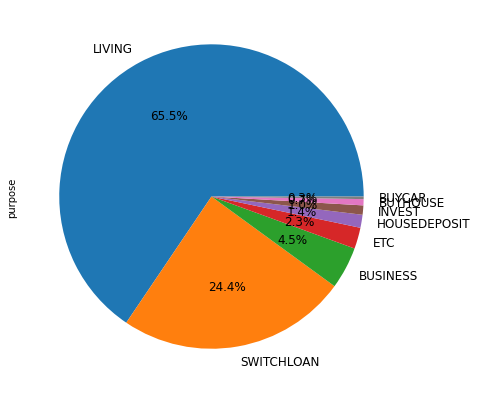

In [23]:
f, ax = plt.subplots(figsize=(7, 7))
sample2['purpose'].value_counts().plot.pie(ax= ax, autopct='%1.1f%%',textprops={'fontsize': 12} )

대출한사람들의 주목적은 생활비 대출

대출받은사람들의 승인금리, 대출받은 돈의 단위 등등 대출받은사람들을 기준으로 여러 데이터를 판단해야한다.